<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [43]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() # Allow matplotlib have access to timestamp 
import matplotlib.ticker as mplticker

In [44]:
USRec = pd.read_excel('recDates.xlsx')

In [45]:
USRec = USRec.iloc[23:]; USRec

,Peak,Trough
23,1953-07-01 00:00:00,1954-05-01 00:00:00
24,1957-08-01 00:00:00,1958-04-01 00:00:00
25,1960-04-01 00:00:00,1961-02-01 00:00:00
26,1969-12-01 00:00:00,1970-11-01 00:00:00
27,1973-11-01 00:00:00,1975-03-01 00:00:00
28,1980-01-01 00:00:00,1980-07-01 00:00:00
29,1981-07-01 00:00:00,1982-11-01 00:00:00
30,1990-07-01 00:00:00,1991-03-01 00:00:00
31,2001-03-01 00:00:00,2001-11-01 00:00:00
32,2007-12-01 00:00:00,2009-06-01 00:00:00


In [46]:
for col in USRec.columns:
    USRec[col] = pd.to_datetime(USRec[col]) 

In [49]:
start = dt.datetime(1950, 1, 1)
end = dt.datetime.today()
FFR = pdr.data.DataReader('FEDFUNDS', 'fred', start, end)
#TrWt_DollarIndex = pdr.data.DataReader('FEDFDTWEXBGSUNDS', 'fred', start, end)

In [53]:
FFR.max()+1

FEDFUNDS    19.1
dtype: float64

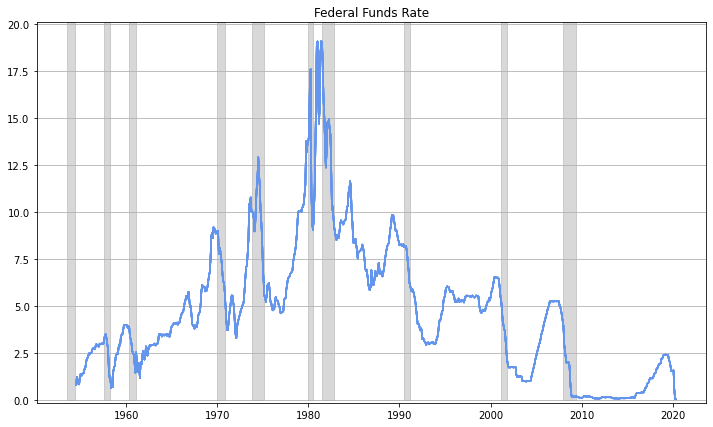

In [70]:
fig, ax = plt.subplots(figsize = (12, 7))
for ix, row in USRec.iterrows():
    ax.fill_between(row,FFR.max()+1, color='gray', alpha=.3)
    ax.plot(FFR, color = 'CornflowerBlue')
ax.yaxis.grid(True)
ax.set_title('Federal Funds Rate')
ax.set_ylim((FFR.min()-.2).iloc[0], (FFR.max()+1).iloc[0])
plt.show()

In [72]:
USRec

,Peak,Trough
23,1953-07-01,1954-05-01
24,1957-08-01,1958-04-01
25,1960-04-01,1961-02-01
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01


In [73]:
USRec.iterrows?